In [1]:
import qutip as qp
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# Jaynes-Cummings Hamiltonian

$$
\hat{H} = \hbar\omega_\text{c}\hat{a}^\dagger\hat{a} 
+ \hbar\omega_a\hat{\sigma}^\dagger\hat{\sigma} 
+ \hbar g\left(
\hat\sigma^\dagger\otimes\hat{a}
+\hat\sigma\otimes\hat{a}^\dagger
\right) + \frac{\hbar\Omega}{2}\left(
\hat{a}e^{-\mathrm{i}\omega_\text{L}t}
+\hat{a}^\dagger e^{\mathrm{i}\omega_\text{L}t}
\right)
$$
where $\omega_\text{c}$ is the cavity's resonance frequency, $\omega_\text{a}$ is the atomic resonance frequency, $g$ is the coupling coefficient and $\Omega$ the drive strength. Applying the correct unitary (it's probably $\hat{U}=e^{\mathrm{i}\omega_\text{L}(\hat{a}^\dagger \hat{a}+\hat{\sigma}^\dagger\hat{\sigma})t}$) will put our Hamiltonian in the frame co-rotating with the laser and remove explicit time dependence. It should end up being
$$
\hat{H} = \hbar\Delta_\text{c}\hat{a}^\dagger\hat{a} 
+ \hbar\Delta_\text{a}\hat{\sigma}^\dagger\hat{\sigma} 
+ \hbar g\left(
\hat\sigma^\dagger\otimes\hat{a}
+\hat\sigma\otimes\hat{a}^\dagger
\right) + \frac{\hbar\Omega}{2}\left(
\hat{a}+\hat{a}^\dagger
\right)
$$
In the notes from Vuckovic's group they set $\Delta_a\to\Delta_c+\delta$, which makes sense; that way $\Delta_c$ just describes tuning the laser drive.

First we need to specify the operators. Because $\hat{a}$ and $\hat{\sigma}$ operate on different Hilbert spaces, our operators are tensor products, i.e., $\hat{a}\to\hat{I}\otimes\hat{a}$ and $\hat{\sigma}\to\hat{\sigma}\otimes\hat{I}$.

In [2]:
nphotons = 15
a = qp.tensor(qp.qeye(2), qp.destroy(nphotons))
sm = qp.tensor(qp.destroy(2), qp.qeye(nphotons))

We also need to define our collapse operators. In the Vuckovic paper they assume the "good emitter" limit, i.e. $\kappa\gg\gamma$, so we will similarly avoid defining $\gamma$ here.

In [16]:
kappa = 1 # everything is referenced to this freq., but just to make that explicit.
gamma = kappa/10
c_op = [np.sqrt(kappa)*a, np.sqrt(gamma)*sm]

Then we define some parameters for our Hamiltonian. It's maybe interesting to sweep the laser detuning, so I leave that free via a `lambda` function.

In [26]:
g = 0.6 * kappa
delta = 3 * g
Omega = 0.4*np.sqrt(kappa/2 + 2*np.imag(np.sqrt(g**2-(kappa/4+1j*delta/2)**2)))
jchamiltonian = lambda det: (det*a.dag()*a               # cavity energy 
                             + (det+delta)*sm.dag()*sm   # atom energy
                             + g*(sm.dag()*a+sm*a.dag()) # coupling
                             + 0.5*Omega*(a+a.dag()))    # drive

QuTiP allows us to calculate the steady-state Hamiltonian:

In [18]:
rho_ss = lambda det: qp.steadystate(jchamiltonian(det), c_op)

and thence expectation values, like

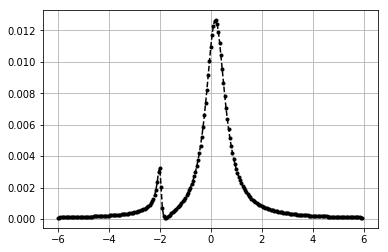

In [19]:
intensity = lambda det: qp.expect(a.dag()*a, rho_ss(det))

detunings = np.arange(-6, 6, 0.05)
intensities = np.vectorize(intensity)(detunings)

plt.plot(detunings, intensities, "k.--")
plt.grid()